# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cite= url+city
    city_url = f'{cite}&appid={weather_api_key}&units=metric'
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
    record_count += 1
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lahad datu
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | valdez
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | crane
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | olhao
Processing Record 11 of Set 1 | thomaston
Processing Record 12 of Set 1 | mpongwe
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | daru
Processing Record 16 of Set 1 | guajara mirim
Processing Record 17 of Set 1 | kuta
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | rio do sul
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | barah
Processing Record 22 of Set 1 | bilibino
Processing Rec

In [4]:
# Convert the city_data into a pandas DataFrame for further analysis
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()
   

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display the first few rows of the DataFrame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lahad datu,5.0268,118.3270,25.48,88,83,1.22,MY,1727784143
1,ta`u,-14.2336,-169.5144,24.69,87,100,6.76,AS,1727784145
2,ust-nera,64.5667,143.2000,-4.15,89,98,0.52,RU,1727784148
3,valdez,1.2492,-78.9831,24.74,84,98,2.98,EC,1727784150
4,port-aux-francais,-49.3500,70.2167,4.84,87,100,12.65,TF,1727784152


In [8]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lahad datu,5.0268,118.3270,25.48,88,83,1.22,MY,1727784143
1,ta`u,-14.2336,-169.5144,24.69,87,100,6.76,AS,1727784145
2,ust-nera,64.5667,143.2000,-4.15,89,98,0.52,RU,1727784148
3,valdez,1.2492,-78.9831,24.74,84,98,2.98,EC,1727784150
4,port-aux-francais,-49.3500,70.2167,4.84,87,100,12.65,TF,1727784152


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

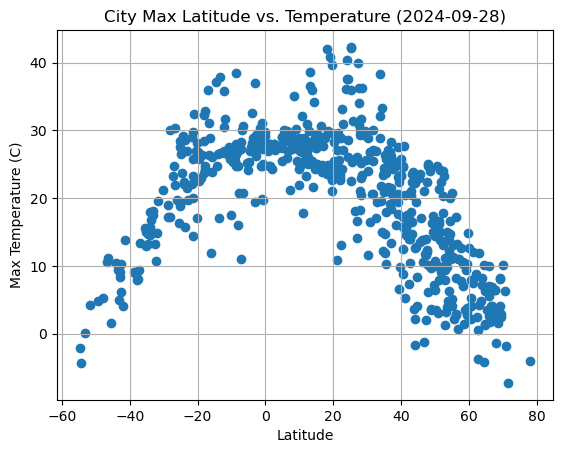

In [10]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
temprature=city_data_df['Max Temp']

plt.scatter(latitude,temprature, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

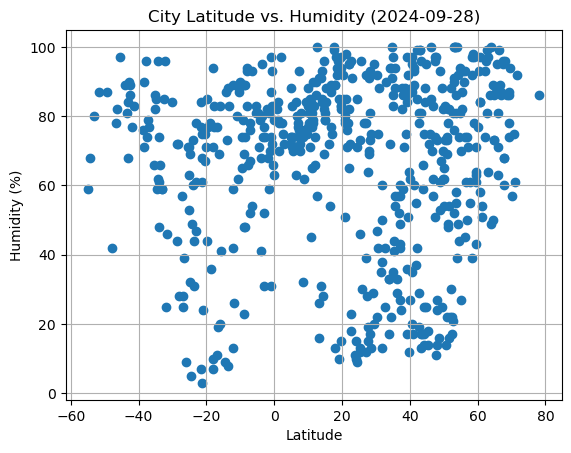

In [11]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
humidity=city_data_df['Humidity']

plt.scatter(latitude,humidity, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

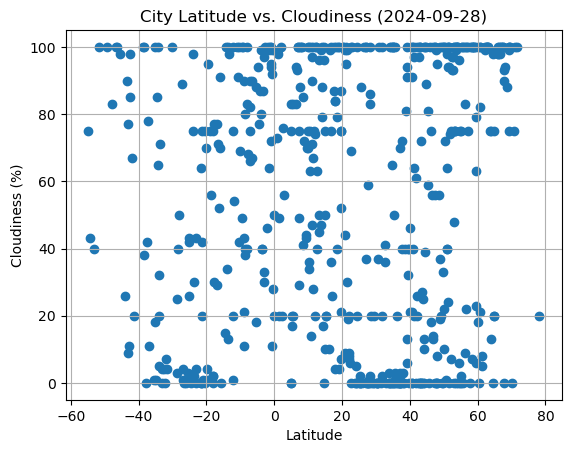

In [12]:
# Build the scatter plots for latitude vs. cloudiness
latitude= city_data_df['Lat']
cloudiness=city_data_df['Cloudiness']

plt.scatter(latitude,cloudiness, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

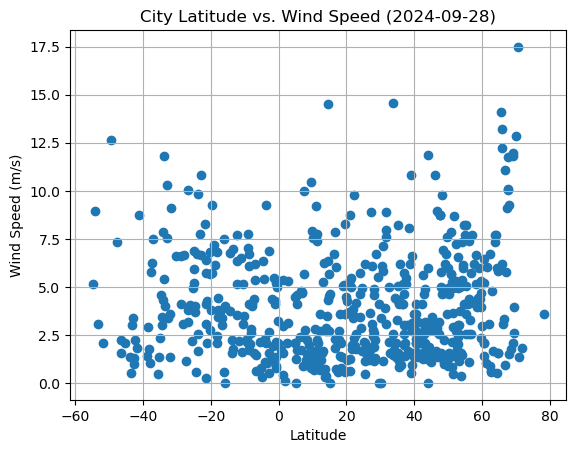

In [13]:
# Build the scatter plots for latitude vs. wind spee
latitude= city_data_df['Lat']
windspeed=city_data_df['Wind Speed']

plt.scatter(latitude,windspeed, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [15]:
# Extracting the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lahad datu,5.0268,118.3270,25.48,88,83,1.22,MY,1727784143
2,ust-nera,64.5667,143.2000,-4.15,89,98,0.52,RU,1727784148
3,valdez,1.2492,-78.9831,24.74,84,98,2.98,EC,1727784150
5,crane,31.3974,-102.3501,20.57,35,0,3.89,US,1727784154
7,nouadhibou,20.9310,-17.0347,28.99,51,99,8.75,MR,1727784158


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ta`u,-14.2336,-169.5144,24.69,87,100,6.76,AS,1727784145
4,port-aux-francais,-49.3500,70.2167,4.84,87,100,12.65,TF,1727784152
6,port elizabeth,-33.9180,25.5701,17.95,61,20,11.83,ZA,1727784015
10,mpongwe,-13.5091,28.1550,37.89,8,13,1.77,ZM,1727784164
11,adamstown,-25.0660,-130.1015,18.77,71,42,5.18,PN,1727784165


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6325361519885414


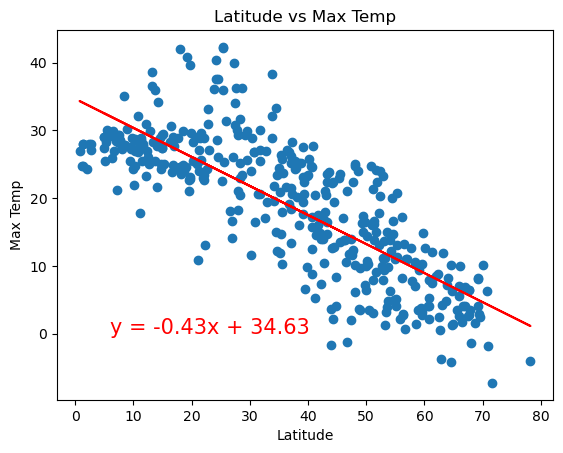

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.6122078977651734


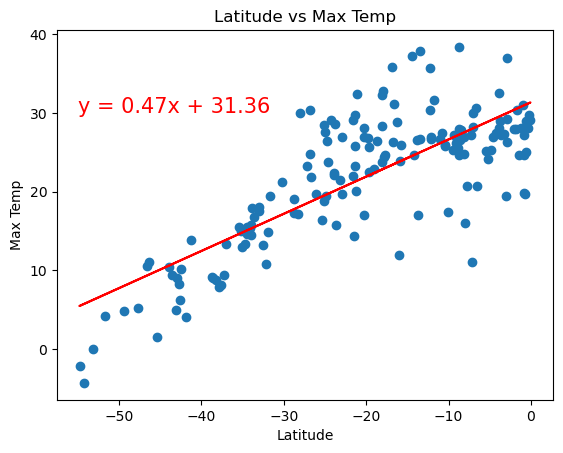

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

## Discussion about the linear relationship: 
The R² values indicate the strength of the linear relationship between temperature and latitude in both hemispheres.

Northern Hemisphere (R² = 0.73): This suggests a strong linear relationship between temperature and latitude, meaning latitude explains about 73% of the variance in temperature. 

Southern Hemisphere (R² = 0.62): This value also indicates a fairly strong linear relationship, though not as strong as in the Northern Hemisphere. Latitude explains around 62% of the variance in temperature in the Southern Hemisphere.

In summary, an increase in latitude (moving away from the equator) results in a decrease in temperature, and this relationship is stronger in the Northern Hemisphere than in the Southern Hemisphere. Therefore, latitude is a key factor influencing maximum temperatures on Earth.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0026635911402874434


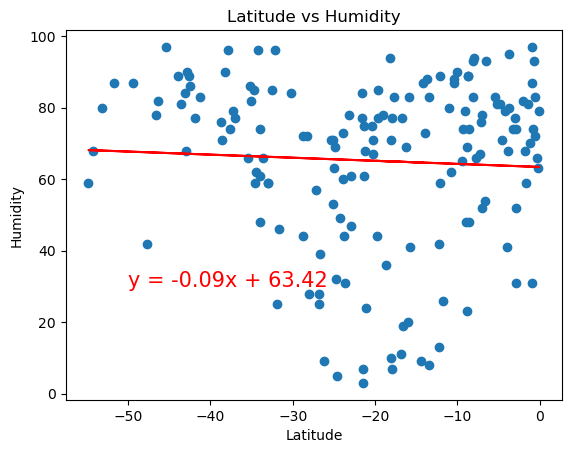

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

The r^2-value is: 0.0026635911402874434


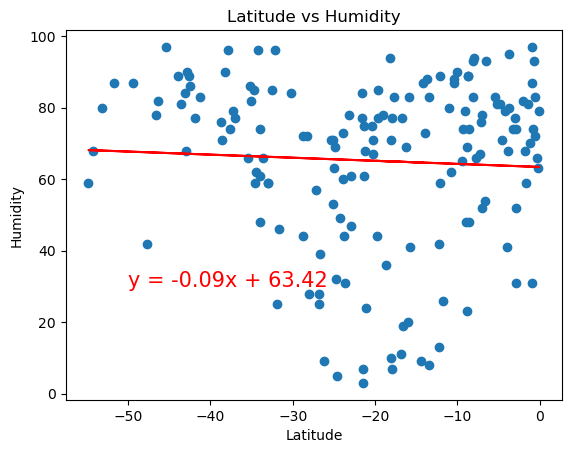

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

## Discussion about the linear relationship:
The R² values for the relationship between latitude and humidity in both the Northern and Southern Hemispheres are extremely low (approximately 0.0015). This indicates that there is virtually no linear relationship between latitude and humidity in either hemisphere. In other words, latitude does not explain the variation in humidity levels, suggesting that humidity is likely influenced by other factors such as local climate conditions, proximity to bodies of water, and atmospheric patterns rather than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.007386475992876956


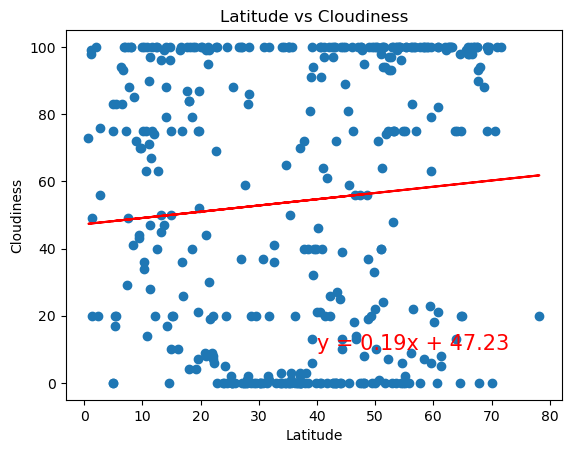

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r^2-value is: 0.02883315283925132


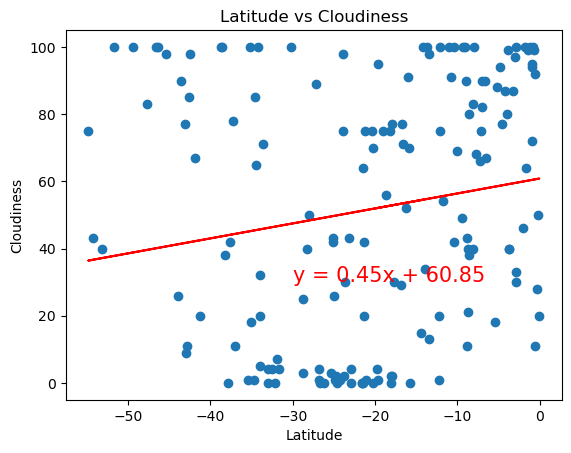

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

## Discussion about the linear relationship:
The R² values for the relationship between cloudiness and latitude are very low in both hemispheres:

Northern Hemisphere (R² = 0.0103): This indicates that only about 1% of the variation in cloudiness can be explained by latitude. There is essentially no linear relationship between latitude and cloudiness in the Northern Hemisphere.

Southern Hemisphere (R² = 0.0043): Similarly, in the Southern Hemisphere, latitude explains less than 0.5% of the variation in cloudiness, showing an almost nonexistent linear relationship.

Since both R² values are extremely low, the correlation between cloudiness and latitude is negligible. This implies that cloudiness is likely influenced by other factors such as local weather systems, geographical features, ocean currents, and seasonal patterns, rather than latitude. Therefore, changes in latitude do not significantly impact cloudiness levels.


### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.06115474159530352


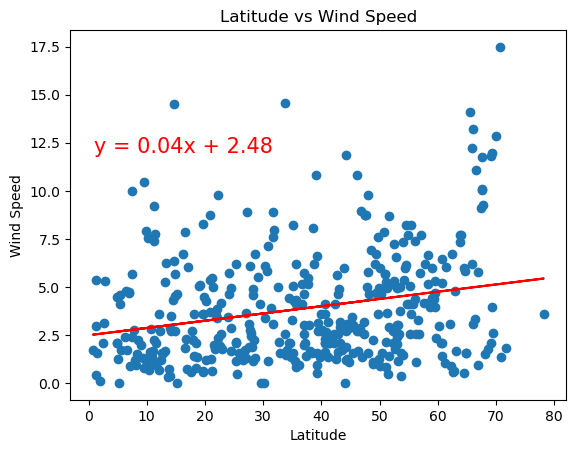

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (1,12))

The r^2-value is: 0.01899899813576454


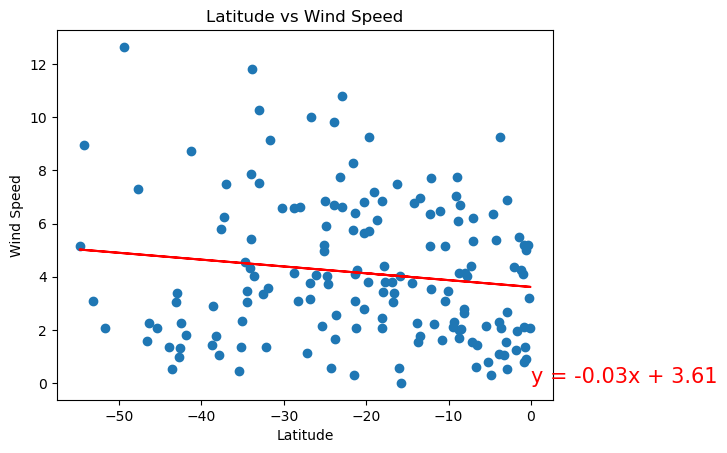

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,0))

## Discussion about the linear relationship:
The R² values for the relationship between wind speed and latitude are quite low in both hemispheres:

Northern Hemisphere (R² = 0.0458): This indicates that only about 4.6% of the variation in wind speed can be explained by latitude. This suggests a very weak linear relationship, implying that latitude is not a significant predictor of wind speed in the Northern Hemisphere.

Southern Hemisphere (R² = 0.0233): Similarly, in the Southern Hemisphere, latitude explains only about 2.3% of the variation in wind speed. This also indicates a very weak linear relationship, showing that latitude has minimal influence on wind speed.
